# B.Tech 2016-20 Electrical Enginnering (Spring 2018)

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import json
from scipy.stats import norm

In [2]:
with open('stres.json') as f:
    data = json.load(f)
    # Filter out 16EE data
    data = {k:v for (k,v) in data.items() if '16MM' in k[:6]}
    
for (k,v) in data.items():
    try:
        print(k,v['cgpa'][1])
    except:
        pass
    
with open('course.json') as c:
    cdata = json.load(c)
    
print ("Total Stuents: %s" % len(data))


16MM01020 6.09
16MM01006 5.32
16MM01003 7.60
16MM01002 8.45
16MM01009 7.79
16MM01005 7.89
16MM01004 7.15
16MM01010 8.09
16MM01011 8.66
16MM01012 8.85
16MM01013 6.94
16MM01014 5.46
16MM01015 6.51
16MM01016 5.94
16MM01017 9.06
16MM01018 5.50
16MM01019 6.81
Total Stuents: 17


## Date of Birth analysis

In [3]:
dob = [v['dob'] for (k, v) in data.items()]

np_dob = (np.array(dob, dtype='datetime64[s]').view('i8'))
average_dob = np.mean(np_dob).astype('datetime64[s]').astype(dt.datetime)
median_dob  = np.median(np_dob).astype('datetime64[s]').astype(dt.datetime)
minimum_dob = np.min(np_dob).astype('datetime64[s]').astype(dt.datetime)
maximum_dob = np.max(np_dob).astype('datetime64[s]').astype(dt.datetime)
print (" Average: %s" % average_dob.strftime("%8B %d, %Y"))
print ("  Median: %s" % median_dob.strftime("%8B %d, %Y"))
print ("  Oldest: %s" % minimum_dob.strftime("%8B %d, %Y"))
print ("Youngest: %s" % maximum_dob.strftime("%8B %d, %Y"))

 Average:   August 10, 1998
  Median:     July 09, 1998
  Oldest:     June 25, 1997
Youngest:     June 17, 1999


## Branch Change Analysis

In [6]:
original_strengeth = 40
bc_cgpa = [v['cgpa'][1] for (k, v) in data.items() if (int(k[-2:]) > 40 and v['cgpa'][1] !='WH')]
#cgpa = [v['cgpa'][2] for (k,v) in data.items() if v['cgpa'][2] != 'WH' ]

bc_cgpa = (np.array(bc_cgpa, dtype='float'))
#cgpa = (np.array(cgpa, dtype='float'))

if len(bc_cgpa>0):
    bc_count = bc_cgpa.size
    bc_highest = np.max(bc_cgpa)
    bc_lowest = np.min(bc_cgpa)
    bc_average = np.mean(bc_cgpa)
    bc_median = np.median(bc_cgpa)
    bc_std = np.std(bc_cgpa)
    print ("Total branch changers: %s" % bc_count)
    print ("\nCGPA (after 2nd sem) for branch change:-")
    print ("Highest: %s" % bc_highest)
    print (" Lowest: %s" % bc_lowest)
    print ("Average: %s" % bc_average)
    print (" Median: %s" % bc_median)
    print("Standard Deviation: %s " %bc_std)
else:
    print('no branch changer')
    pass

no branch changer


## Course wise analysis

In [7]:
courses = dict()
for (k, v) in data.items():
    for (sem, scourses) in v['grades'].items():
        for (course, grade) in scourses.items():
            if course not in courses:
                courses[course] = list()
                courses[course].append(grade)
            else:
                courses[course].append(grade)

clist = list()

def other_grade(l):
    return len(l) - l.count('EX') - l.count('A') - l.count('B') - l.count('C') - l.count('D') - l.count('P') - l.count('F') - l.count('WH')

def analyze_grade(l):
    grade_hash = {'EX': 10, 'A': 9, 'B': 8, 'C': 7, 'D': 6, 'P': 5, 'F': 5}
    hashed_grade = list()
    for grade in l:
        if grade in grade_hash:
            hashed_grade.append(grade_hash[grade])
    hashed_grade = (np.array(hashed_grade, dtype='float'))
    if hashed_grade.size == 0:
        return {'average': 0, 'median': 0}
    return {'average': round(np.mean(hashed_grade), 2), 'median': round(np.median(hashed_grade), 2)}

grade_labels = 'EX', 'A', 'B', 'C', 'D', 'P', 'F', 'WH', 'Other'
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'orange', 'red', 'gray', 'black']

for course, grades in courses.items():
    course_info = cdata[course]
    clist.append((course, course_info['subnane'], course_info['credit'], len(grades), grades.count('EX'), grades.count('A'), 
                 grades.count('B'), grades.count('C'), grades.count('D'), grades.count('P'),
                 grades.count('F'), grades.count('WH'), other_grade(grades), analyze_grade(grades)['average'], analyze_grade(grades)['median']))
#     patches, texts = plt.pie([grades.count('EX'), grades.count('A'), 
#                  grades.count('B'), grades.count('C'), grades.count('D'), grades.count('P'),
#                  grades.count('F'), grades.count('WH'), other_grade(grades)], labels=grade_labels, colors=colors)
#     plt.axis('equal')
#     plt.legend(patches, labels, loc="best")
#     plt.show()
def sortByAverage(element):
    return element[-2]

clist.sort(key=sortByAverage)
df = pd.DataFrame(data = clist)
df.columns = ['Subject Code', 'Subject Name', 'Credits', 'Students', 'EX', 'A', 'B', 'C', 'D', 'P', 'F', 'WH', 'Other', 'Average', 'Median']

df

,Subject Code,Subject Name,Credits,Students,EX,A,B,C,D,P,F,WH,Other,Average,Median
0,CE2L011,Building materials and Construction,3,2,0,0,0,0,1,0,0,1,0,6.00,6.0
1,EE2L004,Introduction to Electromagnetic Engineering,3,6,0,1,0,1,1,2,1,0,0,6.17,5.5
2,ME1L001,Mechanics,4,17,0,0,3,3,5,6,0,0,0,6.18,6.0
3,HS2L002,Speaking and Presentation,4,8,0,1,1,1,2,2,0,1,0,6.57,6.0
4,EC2L005,Analog Communication,4,15,1,1,2,2,6,0,3,0,0,6.67,6.0
5,MA1L002,Mathematics - II,4,17,0,4,0,2,5,4,0,0,2,6.67,6.0
6,PH1L001,Physics,4,17,0,1,3,6,4,2,1,0,0,6.71,7.0
7,EE1L001,Electrical Technology,4,17,1,2,4,2,4,4,0,0,0,6.94,7.0
8,MA1L001,Mathematics -1,4,17,0,4,2,6,4,1,0,0,0,7.24,7.0
9,ID2L001,Entrepreneurship and Small Business Management,3,23,3,3,4,5,3,3,1,1,0,7.36,7.0


## CGPA Analysis

Top 5 Students:

16MM01012  SAMPURNA BORAH  9.15
16MM01017  SHUBHAJIT MONDAL  9.04
16MM01002  MANTRI HARSH RAKESH  8.58
16MM01011  BASANT KUMAR  8.40
16MM01010  GUPTA CHINMAY AMIT  8.19
Students with their cgpa :

16MM01002  MANTRI HARSH RAKESH  8.58
16MM01003  PIYUSH G KHATRI  7.66
16MM01004  PALLI CHAITANYA SAI SRI KRISHNA  7.32
16MM01005  MD ZAHID AHMED  8.13
16MM01006  RAJ NANDAN  4.80
16MM01009  MADDINA N V G PRUDHVI  7.94
16MM01010  GUPTA CHINMAY AMIT  8.19
16MM01011  BASANT KUMAR  8.40
16MM01012  SAMPURNA BORAH  9.15
16MM01013  BOLEM SURYA PRAKASH  7.11
16MM01015  CHIMALADHARI BHANU VASISHT  6.72
16MM01016  KASUKURTHI ROHIT  5.71
16MM01017  SHUBHAJIT MONDAL  9.04
16MM01019  DHARMENDRA MEENA  7.06
16MM01020  VISLAVATH RANJEETH KUMAR  5.89

CGPA:
Highest: 9.15
lowest: 4.8
 Median: 7.66
Average: 7.45
Standard Deviation: 1.22 

   9.5+: 0
  9-9.5: 2
  8.5-9: 1
  8-8.5: 3
  7.5-8: 2
  7-7.5: 3
     7-: 4




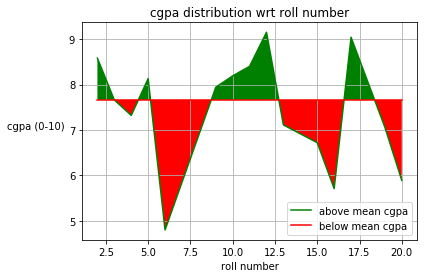

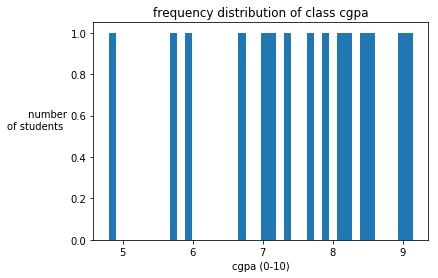

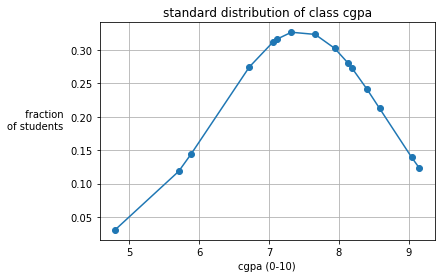

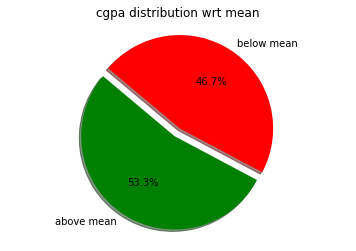

In [11]:

roll_and_cgpa = []
for (k, v) in data.items():
    try:
        roll_and_cgpa.append((k,float(v['cgpa'][2])))
    except:
        pass

    

def sortbycg(l):
   return l[1]

def sortbyroll(l):
    return int(l[0][7:9])


sorted_cgpa = roll_and_cgpa[:]
sorted_cgpa.sort(key=sortbycg)


print("Top 5 Students:\n")
for element in sorted_cgpa[:-6:-1]:
    print('%s '%(element[0]),'%s ' % (data[element[0]]['name']),'%s' %(data[element[0]]['cgpa'][2]))
    
roll_and_cgpa.sort(key=sortbyroll)

# for individual cgpa 

print("Students with their cgpa :\n")
for element in roll_and_cgpa:
    print('%s '%(element[0]),'%s ' % (data[element[0]]['name']),'%s' %(data[element[0]]['cgpa'][2]))

cgpa = np.array([element[1] for element in roll_and_cgpa], dtype='float')

roll = np.array([element[0][7:9] for element in roll_and_cgpa],dtype='int')


cgpa_average = round(np.mean(cgpa), 2)
cgpa_median = round(np.median(cgpa), 2)
cgpa_highest = round(np.max(cgpa), 2)
cgpa_lowest = round(np.min(cgpa),2)
cgpa_standard_deviation = round(np.std(cgpa),2)

print("\nCGPA:")
print("Highest: %s" % cgpa_highest)
print("lowest: %s"% cgpa_lowest)
print(" Median: %s" % cgpa_median)
print("Average: %s" % cgpa_average)
print("Standard Deviation: %s \n"% cgpa_standard_deviation)

print("   9.5+: %s" % len([cg for cg in cgpa if cg >= 9.5]))
print("  9-9.5: %s" % len([cg for cg in cgpa if cg >= 9 and cg < 9.5]))
print("  8.5-9: %s" % len([cg for cg in cgpa if cg >= 8.5 and cg < 9]))
print("  8-8.5: %s" % len([cg for cg in cgpa if cg >= 8 and cg < 8.5]))
print("  7.5-8: %s" % len([cg for cg in cgpa if cg >= 7.5 and cg < 8]))
print("  7-7.5: %s" % len([cg for cg in cgpa if cg >= 7 and cg < 7.5]))
print("     7-: %s" % len([cg for cg in cgpa if cg < 7]))


unit_array = np.ones(len(roll),dtype='int')
fig,cgpa_plot = plt.subplots()

print('\n')

label=['above mean','below mean']
cgpa_plot.plot(roll,cgpa,label='above mean cgpa',color='green')
cgpa_plot.plot(roll,cgpa_median*unit_array,label='below mean cgpa',color='red')
cgpa_plot.grid(b = True)
cgpa_plot.legend()
cgpa_plot.fill_between(roll,cgpa,cgpa_median*unit_array,where= cgpa >= cgpa_median*unit_array,facecolor = 'green',interpolate = True )
cgpa_plot.fill_between(roll,cgpa,cgpa_median*unit_array,where= cgpa< cgpa_median*unit_array,facecolor = 'red',interpolate = True )
plt.xlabel('roll number')
plt.ylabel('cgpa (0-10)', horizontalalignment='right',rotation =0)
plt.title('cgpa distribution wrt roll number')
plt.show()

print('\n')
#plt.fill(cgpa,cgpa_median*median,'r')g
sorted_cgpa=cgpa[:]
sorted_cgpa.sort()
fig,histo_cgpa = plt.subplots()
histo_cgpa.hist(sorted_cgpa,bins=40)
#histo_cgpa.fill_between(roll,histo_cgpa,where =sorted_cgpa >= 8.0,facecolor = 'green',interpolate = True )
#histo_cgpa.fill(histo_cgpa, where = sorted_cgpa >= cgpa_median)
plt.title('frequency distribution of class cgpa')

plt.xlabel('cgpa (0-10)')
plt.ylabel(' number\nof students ', horizontalalignment='right',rotation =0)
plt.show()
#plt.plot(norm.pdf(cgpa_in_seq,cgpa_median,cgpa_standard_deviation))

print('\n')
fig = norm.pdf(sorted_cgpa, np.mean(sorted_cgpa), np.std(sorted_cgpa))
plt.plot(sorted_cgpa,fig,'-o')
plt.title('standard distribution of class cgpa')
plt.xlabel('cgpa (0-10)')
plt.ylabel(' fraction \nof students ', horizontalalignment='right',rotation =0)
plt.grid(b = True)
plt.show()

above_mean = [cg for cg in cgpa if cg >= cgpa_median]
below_mean = [cg for cg in cgpa if cg < cgpa_median]

print('\n')
labels = 'above mean','below mean'
sizes = [len(above_mean),len(below_mean)]
#print(len(above_mean),len(below_mean))
explode = (0.1,0)
colors = ['green','red']
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%2.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.title('cgpa distribution wrt mean')
plt.show()

# results plot 
this class posses second maximum deviation from mean,only after cse, compare to other department batches. Special care is required for some students to improve their academic performance.


https://analytics4all.org/2016/05/05/python-histograms-and-frequency-distribution/

https://etav.github.io/python/count_basic_freq_plot.html for histogram frequency distribution

https://stackoverflow.com/questions/20011494/plot-normal-distribution-with-matplotlib for ploting the standard deviation